# Gillespie Model for inter and intramolecular association preference

# Load functions

In [1]:
# illegal position generator tells us where NOT to move to

In [1344]:
def illegal_position_generator(spaceMax, spaceMin):
    from itertools import permutations
    boundary = spaceMax + 2
    lower_boundary = spaceMin - 1
    items = range(lower_boundary, boundary)
    moves = {}
    i = 0
    for p in permutations(items, 2):
        moves[i] = p
        i += 1

    illegal_moves = {}
    legal_moves = {}
    for key,value in moves.items():
        for n,i in enumerate(value):
            try:        
                if i <= spaceMin or i >= spaceMax:
                    illegal_moves[key] = value
            except:
                continue
                
    for key, value in illegal_moves.iteritems():
        if value in moves.values():
            del moves[key]

    #This changes values into keys and vice versa
    moves = {y:x for x,y in moves.iteritems()}
    illegal_moves = {y:x for x,y in illegal_moves.iteritems()}
   
    # include positions at edges
    illegal_moves.update({(spaceMin,spaceMin):10000000, (spaceMax, spaceMax):100000001 })
    
    return moves, illegal_moves

In [1345]:
# layout_gen function randomly places nodes on a NxN grid

In [1346]:
def layout_gen(node_number, legal_moves): 
    import random
    
    wanted_keys = random.sample(legal_moves.keys(), node_number)
    #using dictionary comprehension to subset a dictionary by keys
    layout_old = dict((k, legal_moves[k]) for k in wanted_keys if k in legal_moves)
    
   # #I am going to omit making this dict because I can keep tract of names using the values of layout_old as a name attribute in a graph
   # #layout_names = {y:x for x,y in layout_old.iteritems()}
    
    return layout_old

## illegal bounday function

In [1347]:
spaceMax = 20
spaceMin = 0

def illegal_boundaries(spaceMax):
    mydict = {}
    j = 1
    for i in range(spaceMax):
        mydict[ (0, i) ] = j
        j += 1
        mydict[ (i, 0) ] = j
        j += 1
        mydict[ (i+1, 0)] =j
        j += 1
        mydict[ (i, 0)] =j
        j += 1
        mydict[ (-1, i+1) ] = j
        j += 1
        mydict[ (-1, i) ] = j
        j += 1

    mydict[ (spaceMax-1, spaceMax-1) ] = 0
    
    
    return mydict

illegal_moves = illegal_boundaries(spaceMax)

# Initiate node layout

In [1348]:
spaceMax = 20
spaceMin = 0
node_number = 80
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)
layout_old = layout_gen(node_number, legal_moves)

## Movement function

In [1349]:
import random
from operator import add

position_selected = random.choice( layout_old.keys() )

def Mover(position_selected, layout_old, illegal_moves):
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4
    
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))
    
    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected

## movement finder function


In [1350]:
from operator import add

position_selected = (8, 5)
spaceMin = 0
spaceMax = 9

def movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax):
    total_moves = 4
    my_possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1) }

    finding_neighbors = {}
    j = 0
    for i in my_possibilities.values():
        finding_neighbors[tuple(map(add, position_selected, i))] = j
        j += 1

   
    if position_selected[0] == spaceMin and position_selected[1] == spaceMin:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax and position_selected[1] == spaceMax:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves 
    if position_selected[0] == spaceMin or position_selected[1] == spaceMin:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax or position_selected[1] == spaceMax:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    else:
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        #sd3 = set(illegal_moves.keys())
        current_moves = total_moves - len(sd1.intersection(sd2)) #- len(sd1.intersection(sd3))
        return current_moves
    
movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)

2

## define allRxn which decides what reaction to perform next

In [1351]:
def allRxn(move, bind, self_bind, dissociate):
    
    k_0 = move + bind + self_bind + dissociate
    
    options = numpy.zeros((4, 1))
    options[0] = move/k_0
    options[1] = bind/k_0
    options[2] = self_bind/k_0
    options[3] = dissociate/k_0
    
    random_value = random.uniform(0, 1)
    
    if 0 <= random_value <= options[0]:
        return 'move'
    elif options[1] <= random_value < options[2]:
        return 'bind'
    elif options[2] <= random_value < options[3]:
        return 'self_bind'
    else:
        return 'dissociate'

In [1352]:
def allRxn(move, bind, dissociate):
    
    k_0 = move + bind + dissociate
    
    options = numpy.zeros((3, 1))
    options[0] = move/k_0
    options[1] = bind/k_0
    options[2] = dissociate/k_0
    
    myNumber = random.uniform(0, 1)
    myList=options
    
    out_val = min(myList, key=lambda x:abs(x-myNumber))
    
    #print options
    
    if out_val == options[0]:
        return 'move'
    if out_val == options[1]:
        return 'bind'
    if out_val == options[3]:
        return 'dissociate'


In [1353]:
allRxn(move_k, bind_k, dissociate_k)

'bind'

## association function

In [1354]:
# as a back up just in case…
def new_association_function3(x, d, g, new_dict, val):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list
    try:
        # block raising an exception
        if x in new_dict and val == True:
            options = new_dict[x]
            toBind = random.choice(options)
            if str(toBind) in g.vs['name']:
                v1_position = g.vs['name'].index( str(toBind) )
            else:
                v1_position = g.vs['name'].index( toBind )
            if str(x) in g.vs['name']:
                v2_position = g.vs['name'].index( str(x) )
            else:
                v2_position = g.vs['name'].index( x )
            if g.degree(v1_position) < 1 and g.degree(v2_position) < 1:
                g.add_edge(v1_position, v2_position)
            return new_dict[x]
        elif x in new_dict and val == False:
            return new_dict[x]
        else:
            new_dict[x] = 'NaN'
            return new_dict[x]
    except:
        pass # doing nothing on exception



In [1355]:
# as a back up just in case…
def new_association_function2(x, d, g, new_dict, val):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list
    if x in new_dict and val == True:
        options = new_dict[x]
        toBind = random.choice(options)
        
        # exit out of set in loop of these conditions are not met
        
        if str(toBind) in g.vs['name']:
            v1_position = g.vs['name'].index( str(toBind) )
        else:
            v1_position = g.vs['name'].index( toBind )
        if str(x) in g.vs['name']:
            v2_position = g.vs['name'].index( str(x) )
        else:
            v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 1 and g.degree(v2_position) < 1:
            g.add_edge(v1_position, v2_position)
        return new_dict[x]
    elif x in new_dict and val == False:
        return new_dict[x]
    else:
        new_dict[x] = 'NaN'
        return new_dict[x]

## define edge selector and boundary checker function

In [1356]:
def edge_selector(neigh_dict):
    ''' (dict) -> tuple
    
    Find a node with neighbors. 
    
    The selected node will be interegated for edge binding with its neighbors
    
    neigh_dict should be the dict where neigbhors are kept
    
    
    
    # test when there are neighbors
    >>> neighbor_dic = { (1, 2): [(1, 3)], (5, 5): 'NaN', (1, 3): [(1, 2), (1, 4)], (1, 4): [(1, 3)] }
    >>> output = edge_selector(neighbor_dic)
    >>> output != 'NaN'
    True
    
    # test to make sure output is a tuple
    >>> type(output)
    <type 'tuple'>
  


    # test when there are no neighbors
    >>> neighbor_dic2 = { (1, 2): 'NaN', (5, 5): 'NaN', (1, 3): 'NaN', (1, 4): 'NaN' }
    >>> output = edge_selector(neighbor_dic2)
    >>> output == 'NaN'
    True
    
    
    # check that selected node exists in the dict I got it from
    >>> neighbor_dic = { (1, 2): [(1, 3)], (5, 5): 'NaN', (1, 3): [(1, 2), (1, 4)], (1, 4): [(1, 3)] }
    >>> output = edge_selector(neighbor_dic)
    >>> if output in neighbor_dic: print True
    True
    

    '''
    
    # set up range to loop through (at worst this function is O(n) )
    index_options = range(0, len(neigh_dict) )
    val = 'NaN'

    for t in index_options:
        
        # randomly collect matched key value pairs
        key = random.choice(neigh_dict.keys() )
        value = neigh_dict[key]

        # if node contains neighbors (i.e, it's not 'NaN'), then choose the node
        if value != 'NaN':
            val = key
            break

    return val
    
doctest.testmod()

TestResults(failed=0, attempted=65)

In [1357]:
index_options = range(0, len(neighbor_tracking) )
val = 'NaN'

for t in index_options:
    
    key = random.choice(neighbor_tracking.keys() )
    value = neighbor_tracking[key]
    
    if value != 'NaN':
        val = random.choice(value)
        break

return val
   

SyntaxError: 'return' outside function (<ipython-input-1357-195a5723e59a>, line 13)

In [1407]:

def boundary_checker(x, spaceMin, spaceMax):
    if spaceMax in x or spaceMin in x:
        x = list(x)
        if x[0] == spaceMin:
            x[0] = spaceMin + 1
        elif x[0] == spaceMax:
            x[0] = spaceMax - 1
        elif x[1] == spaceMin:
            x[1] = spaceMin + 1
        elif x[1] == spaceMax:
            x[1] = spaceMax - 1
    return tuple(x)

In [1359]:
def self_associate(x, d, g, val):
    # this function keeps a running total of the self_loops that have been formed
    try:
        v_position = g.vs['name'].index( str(x) )
   
        if g.degree(v_position) < 1:
            g.add_edge(v_position, v_position)
        
        # calculate the number of new self loops made
        g2= g.copy()
        totals = sum(g.degree())
        self_loops = sum(g2.simplify(multiple = False, loops = True, combine_edges=None).degree())
        # this requires you to divide by 2 because the edges are not directed and are therefore being counted twice for the same node
        self_loops_count = (totals - self_loops)/2
        
        return self_loops_count
        
    except:
        pass
    

In [1360]:
## TO DO: FIX THIS FUNCTION
# 1) 


def find_node(node_position, neighbor_tracking, graph):
    ''' (tuple, dict, igraph) -> tuple

    This function identifies a node to associate with.
    1) First, it looks for neighbors for a selected node position.
    2) Then, it checks to see if that node has degree < 4
    3) If these conditions are met, then the function returns a node to bind to
    4) If there are more than 1 available nodes to bind to, a node is randomly selected

    # set up
    >>> neighbor_dic = { (1, 2): [(1, 3)], (5, 5): 'NaN', (1, 3): [(1, 2), (1, 4)], (1, 4): [(1, 3)] }
    >>> G = Graph()
    >>> G.add_vertices(4)
    >>> G.vs['name'] = ['(1, 2)', '(1, 3)', '(1, 4)', '(5, 5)']
    
    
    # test for finding a node with one neighbor
    >>> np = (1, 2)
    >>> find_node(np, neighbor_dic, G)
    (1, 3)
    
    # test another position
    >>> np = (1, 3)
    >>> output = find_node(np, neighbor_dic, G)
    >>> if type(output) is tuple: True
    True
    

    '''
    
    
    assert type(node_position) is tuple, 'node_position must be a Tuple'
    assert node_position in neighbor_tracking, 'node_position must be in neighbor_tracking dict'

    # catch nodes with no neighbors
    assert neighbor_tracking[node_position] != 'NaN', 'node_position selected has no neighbors!'
    

    list_of_neighbors = neighbor_tracking[node_position]

    
    # edge_selector function is already finding nodes with neighbors. 
    
 
    

    node_names = []
    for node in list_of_neighbors:
        node_degrees = graph.vs.find(name= str(node) ).degree()

        #check to see which node has degree < 4
        if node_degrees < 4:
            node_names.append(node)
        else:
            pass

    # NOTE: will return initial node position if node_names is empty! 
    if len(node_names) > 0:
        selected_node = random.choice(node_names)
    else:
        selected_node = node_position
    return selected_node

    # if there aren't any available neighbors, return the node in question's position
    #if list_of_neighbors == 'NaN':
    #    return node_position

import doctest
doctest.testmod()


TestResults(failed=0, attempted=65)

In [1361]:
#neighbor_dic = { (1, 2): [(1, 3)], (5, 5): 'NaN', (1, 3): [(1, 2), (1, 4)], (1, 4): [(1, 3)] }
#G = Graph()
#G.add_vertices(4)
#G.vs['name'] = ['(1, 2)', '(1, 3)', '(1, 4)', '(5, 5)']
#np = (1, 2)
#find_node(np, neighbor_dic, G)

In [1362]:
def bind(node_position, neighbor_position, G):
    ''' (tuple, tuple, g) -> NoneType
    
    Add an edge between two nodes.

    # set up
    >>> G = Graph()
    >>> G.add_vertices(4)
    >>> G.vs['name'] = ['(1, 2)', '(1, 3)', '(1, 4)', '(5, 5)']

    #test for edge binding
    >>> node_position = (1, 2)
    >>> neighbor_position = (1, 3)
    >>> bind(node_position, neighbor_position, G)
    >>> G.degree()
    [1, 1, 0, 0]


    
    '''
    
    node_1 = G.vs['name'].index( str(node_position) )
    node_2 = G.vs['name'].index( str(neighbor_position) )
    
    G.add_edge(node_1, node_2)

doctest.testmod()

TestResults(failed=0, attempted=65)

In [1363]:
def initiate_graph_position(g, layout):
    ''' (graph, dict) -> NoneType
    
    This function updates the positions (name attribute) in the graph. 
    It adds new positions from a layout, such as layout_old.
    
    NOTE: This function may cause problems because I am not updating the positions by MATCHING the values
    I am simply adding new attributes to each node. Will see if this works well to continue forward
    and will update accordingly if it breaks or doesn't work the way I want it to
    

    '''
    
    i = 0
    for key, value in layout.iteritems():
        g.vs[i]['name'] = str(key)
        g.vs[i]['position'] = key
        g.vs[i]['index'] = value
        i = i + 1



In [1364]:
def possible_associations(position, layout):
    ''' (tuple, dict, graph, dict, bool) -> NoneType

    This function identifies ALL possible node neigbors for EACH node. 
    This positional information is stored in a dict called: neighbor_tracking

    # test for node with one neighbor

    >>> layout_dict = {(1, 2): 1, (10, 12): 10, (2, 2): 20, (100, 12): 12}
    >>> x = (1, 2)
    >>> output = possible_associations(position=x, layout=layout_dict)
    >>> output
    [(2, 2)]


    # test for node with no neighbors    
    >>> layout_dict = {(1, 2): 1, (10, 12): 10, (2, 2): 20, (100, 12): 12}
    >>> x = (100, 12)
    >>> output = possible_associations(x, layout_dict)
    >>> output
    'NaN'


    '''
    try:
        posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
        new_posit = posit + position


        new_list = []
        for i in new_posit:
            b = tuple(i)

            if b in layout:
                new_list.append(b)
                #neighbors[position] = new_list

        # deal with no neighbors next to node of interest
        if len(new_list) == 0:
            #neighbors[position] = 'NaN'
            new_list = 'NaN'

        return new_list
    except:
        pass

import doctest
doctest.testmod()


TestResults(failed=0, attempted=65)

In [1365]:
pp = (1, 2)
narr = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
sdsd = pp + narr
print narr
print sdsd

[[ 1  0]
 [ 0  1]
 [-1  0]
 [ 0 -1]]
[[2 2]
 [1 3]
 [0 2]
 [1 1]]


In [1366]:
def update_neighbors(oldPosition, newPosition, layout_dict, neighbors_dict):
    ''' (tuple, tuple, dict, dict) -> NoneType
    
    This function updates neighbor tracking dict (neighbor_tracking) based on which nodes 
    moved in the movement dict (layout_old)
    

    1) remove node from move_count dict (!!!not updating this for now!!!)
    2) remove it from neighbor_tracking dict
    3) add it back to neighbor_tracking dict with new position by calling the possible_associations function
    
    
    >>> oldPosi = (1, 2)
    >>> newPosi = (2, 2)
    >>> n_dict = {(1, 2):'NaN', (3, 2): 'NaN', (5, 5):'NaN', (2, 3): 'NaN'}
    >>> lo_dict = { (1, 2): 19, (3, 2): 22, (5, 5): 100, (2, 2): 340, (2, 3): 120 }
    
    # test for movement to nearby nodes
    >>> update(oldPosition=oldPosi, newPosition=newPosi, layout_dict=lo_dict, neighbors_dict=n_dict)
    
    # test updating the neighbor dict (n_dict) with the new neighbors for the node that moved (newPosi)
    >>> n_dict[newPosi]
    [(3, 2), (2, 3)]
    
    # test updating the NEIGHBORS neigbhor in n_dict. If it updated correctly
    # then n_dict[(3, 2)] = [(2, 2)] instead of 'NaN'
    >>> n_dict[(3, 2)]
    [(2, 2)]
    
    # test for succesfully updating the neighbors of the neighbors
    >>> n_dict[(2, 2)]
    [(3, 2), (2, 3)]
    ''' 
    

    #move_count.pop(oldPosition)
    #neighbors_dict.pop(oldPosition)

    try:
        neighbor_tracking[newPosition] = neighbor_tracking[oldPosition]
        del neighbor_tracking[oldPosition]

        # I don't need to change layout_old because its being done in the Mover function
        #layout_dict.pop(oldPosition)


        # update neighbor_tracking dict with new position and neighbors
        new_neighbor_positions = possible_associations(position=newPosition, layout=layout_dict)

        # update the new node position with the new neighbors
        neighbors_dict[newPosition] = new_neighbor_positions

        # update the position of the NEIGHBORS neighbors: need to fix
        for position in new_neighbor_positions:

            new_neighbor_position = possible_associations(position=position, layout=layout_dict)

            neighbors_dict[position] = new_neighbor_position    
    except:
        pass



doctest.testmod()

**********************************************************************
File "__main__", line 34, in __main__.edge_selector
Failed example:
    if output in neighbor_dic: print True
Expected:
    True
Got nothing
**********************************************************************
1 items had failures:
   1 of  10 in __main__.edge_selector
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=65)

In [1367]:
            # 
            if position not in layout_dict:
                new_neighbor_positions.remove(position)
                
                pass
            if position not in neighbors_dict:
                pass


NameError: name 'new_neighbor_positions' is not defined

In [1368]:
def update_graph(G, layout, new_position, old_position):
    ''' (igraph, dict, tuple, tuple) -> NoneType
    
    Update graph attributes based on the node that has moved. 
    
    This function should run inside the main code. 
    
    The function initiate_graph_position should run at the beginning to initiate the graph attributes
    
    
    
    >>> lo_dict = { (1, 2): 19, (3, 2): 22, (5, 5): 100, (2, 2): 340, (2, 3): 120 }
    >>> old = (5, 5)
    >>> new = (6, 5)
    >>> G = Graph()
    >>> G.add_vertices(5)
    >>> initiate_graph_position(G, lo_dict)
    
    # "move" a node in the layout dict
    >>> lo_dict[new] = lo_dict.pop(old) 
    
    # get index of position
    >>> old_position_index = G.vs['position'].index(old)
    
    # check initial values
    >>> G.vs[old_position_index]['position']
    (5, 5)
    >>> G.vs[old_position_index]['name']
    '(5, 5)'
    >>> G.vs[old_position_index]['index']
    100
    
    # update the attribute using update_graph
    >>> update_graph(G=G, layout=lo_dict, new_position=new, old_position=old)
    
    # test that I get new position
    >>> G.vs[old_position_index]['position']
    (6, 5)

    # test that I get new name
    >>> G.vs[old_position_index]['name']
    '(6, 5)'

    # test that I get new index
    >>> G.vs[old_position_index]['index']
    100
   
    '''
     
    # find the index of the position 

    graph_index = G.vs['position'].index(old_position)
    
    # update each attribute
    G.vs[graph_index]['name'] = str(new_position)
    G.vs[graph_index]['position'] = new_position
    G.vs[graph_index]['index'] = layout[new_position]
    

doctest.testmod()

TestResults(failed=0, attempted=65)

# Initiate Gillespie model

In [1543]:
##### from igraph import *
from operator import add
import numpy
from igraph import *

spaceMax = 30
spaceMin = 0
node_number = 1
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)
layout_old = layout_gen(node_number, legal_moves)

# initiate movement count
move_count = {}

for k,v in layout_old.items():
    val = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
    move_count[k] = val
    
# initiate neighbor tracking

import collections
g = Graph(len(layout_old))


initiate_graph_position(g, layout_old)    



neighbor_tracking = {}
for key, value in layout_old.iteritems():
    neighbor_tracking[key] = possible_associations(position=key, layout=layout_old)


# initiate neighbor edge count
bind_count = {}
for k,v in neighbor_tracking.items():
    bind_count[k] = len(v)

# initiate self binding
self_bind_count = {}
for k, v in layout_old.items():
    self_bind_count[k] = v

    

In [1203]:
import operator
for key, value in sorted(layout_old.items(), key=operator.itemgetter(1)):
    print value
    print key

27
(1, 3)
53
(3, 5)
68
(4, 8)
93
(6, 9)
115
(8, 6)


In [1223]:
layout_old[(10, 1)] = 68
del layout_old[(4, 8)]

   115  27  53  68  93
0    8   1   3  10   6
2    1   3  10   6   8
1    1   3  10   6   8

   115  27  53  68  93
0    8   1   3  10   6
2    1   3  10   6   8
1    1   3  10   6   8


In [1252]:
# initialize dataframe

new_dx = {}
new_dy = {}

for key, value in sorted(layout_old.items(), key=operator.itemgetter(1)):
    # new dict

    new_dx[str(value)] = list(key)[0]
    new_dy[str(value)] = list(key)[1]

    #new dataframe
    x = pd.DataFrame(new_dx, index = [0])
    y = pd.DataFrame(new_dy, index = [0])



In [1247]:
print x
print layout_old


   115   27  53  68  93
0    8  100   3  10  20
{(100, 100): 27, (20, 30): 93, (10, 1): 68, (8, 6): 115, (3, 5): 53}


In [1379]:
def displacement(dic):
    ''' (dict) -> two numpy_array
    
    1. split list into x, y
    2. return the split positions (one for each dimension: x, y)

    '''
    
    # set up empty dataframes
    #update df 
    poss_x = []
    poss_y = []
    for key, value in sorted(dic.items(), key=operator.itemgetter(1)):
        x_pos = key[0]
        y_pos = key[1]
        
        
        poss_x.append(x_pos)
        poss_y.append(y_pos)
    
    
    return poss_x, poss_y


In [1329]:
# put into initialization step

x, y = displacement(layout_old)
print x
#print layout_old


[1, 2, 4, 6, 9]


# Run Gillespie

In [1545]:
from __future__ import division
import numpy as np 
import igraph
import random


graph_move = []
graph_self_bind = []

total_time = 100
k_move = 1e6
k_bind = 1e5
k_off = 1e1
len_factor = 1
tau = 1e-3
times = []
degree_dist = {}
degree_dist_all = {}
binding_result = []

summarized_results = np.zeros(shape=(total_time+1,2))
rxn_results = np.zeros(shape=(total_time+1,3))
self_binding_count = 0



store_graph = {}
store_layout = {}

t = 0

x_list = []
y_list = []
while t <= total_time:


    ## Calculate all possible reactions

    move = sum(move_count.values() )                              # movement
    move_k = move * k_move



    ################################
    # binding
    ################################
   

    #bind = sum(bind_count.values() )                              # binding
    bind_k = len(g.get_edgelist()) * k_bind * 0.2



    ################################
    # dissociate
    ################################


    dissociate = len(g.get_edgelist())                            # dissociation
    dissociate_k = k_off * dissociate

    # dissociation
    ##dissociate = len(g.get_edgelist())                           
    ##dissociate_k = dissociate * k_off * tau

    # Time at which the next reaction will take place
    rate_sum = move_k + bind_k + dissociate_k                   
    total_tau = random.expovariate(lambd=rate_sum)                

    if not times:
        times.append(total_tau)
    else:
        total_tau = total_tau + times[t-1]
        times.append(total_tau)                                             # Save time as a tuple

    
    
    #reaction = allRxn(move_k, bind_k, dissociate_k)            # Sample from uniform distribution to select next rxn
    choices = ['move', 'bind']
    reaction = 'move'
    #reaction = random.choice(choices)
    



    if reaction == 'move':
        print 'move'
        
        #store graph 
        store_layout[t] = layout_old.keys()
        store_graph[t] = g.vs['position']
        
        #store rxn results
        rxn_results[t] = (1, 0, 0)

        # randomly select a node to move
        position_selected = random.choice(layout_old.keys() )                  

        if position_selected in layout_old:
            #move_count.pop(position_selected)
            #neighbor_tracking.pop(position_selected)
            

            # if position_selected is of degree 0, then move it normally using Mover function            
            layout_old, pos = Mover(position_selected, layout_old, illegal_moves)       

           
            # update graph attributes
            update_graph(G=g, layout=layout_old, new_position=pos, old_position=position_selected)

           
            # update neighbor positions
            update_neighbors(oldPosition=position_selected, newPosition=pos, layout_dict=layout_old, neighbors_dict=neighbor_tracking)
        
         
            # update the count of moves the selected object can perform still
            move_count[pos] = movement_finder(pos, illegal_moves, layout_old, spaceMin, spaceMax)
            
            new_association_function3(pos, layout_old, g, neighbor_tracking, False)



    if reaction == 'bind':
        print 'bind'

        #store rxn results
        rxn_results[t] = (0, 1, 0)
        
        # select a node with neighbors randomly for forming an edge
        position_selected = edge_selector(neighbor_tracking)                 
        
    
        #move_count.pop(position_selected)
        #neighbor_tracking.pop(position_selected)

        # bind & update move_count and neighbor_tracking dict
        #move_count[position_selected] = movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)
        
        print 'position_selected: {0}'.format(position_selected)

        
        #find a neighboring node
        neighbor_to_bind = find_node(position_selected, neighbor_tracking, g)

        print 'neighbor_to_bind: {0}'.format(neighbor_to_bind)
        print ''
        #bind to a neighboring node by adding edge in graph
 

        bind(position_selected, neighbor_to_bind, g)
        #new_association_function3(position_selected, layout_old, g, neighbor_tracking, True)

        # simplify the graph 
        g.simplify(g)


        #print 'bind', position_selected
        #print g

  
    if reaction == 'dissociate':
        print 'dissociate'
        
        #store rxn results
        rxn_results[t] = (0, 0, 1)

        edge_list = g.get_edgelist()

        try:
            edge_selected = random.choice(edge_list)
            g.delete_edges(edge_selected)
        except:
            pass

        


    # store graph at each interval
      
    graph_move.append(move)
    graph_self_bind.append(self_binding_count)


    for i in range(len(g.get_edgelist() ) ):
        # store tuple in online fashion
        to_check = g.get_edgelist()[i]
        # count the number of times this index repeats. 
        # If it is once, then it is a higer level binder. If it is two it is a self binder
        binding_result.append( to_check.count(to_check[0]) )


    ctr = collections.Counter(binding_result)
    try:
        summarized_results[t] = ctr.values()
    except:
        pass

    ## plot at each step 
    #dictlist = []
    #for key, value in layout_old.iteritems():
    #    dictlist.append(key)
    
    
    ## TEMP 
    neighbor_tracking = {}
    for key, value in layout_old.iteritems():
        neighbor_tracking[key] = possible_associations(position=key, layout=layout_old)
    ### 
    
    x, y = displacement(layout_old)
    x_list.append(x)
    y_list.append(y)
    
    t += 1


#update the graph
#initiate_graph_position(g, layout_old)   

    
#total_rxn_5[10] = rxn_results.sum(axis=0)
#total_rxn_60[10] = rxn_results.sum(axis=0)

move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move
move


# Diffusion analysis

In [1529]:
print times[10]
print times[100]
print times[500]
print times[1000]
print times[5000]
print times[10000]

3.67318474817e-08
2.06367602272e-07
6.51651332873e-07
1.01005750204e-06
2.60276667679e-06
4.17335759874e-06


In [1465]:
i = 0
displace_list = []
while i < len(x_list) - 1:    
    displace = map(operator.sub, x_list[i+1] ,x_list[i])
    displace_list.append(displace)
    i += 1

In [1471]:
List = np.array(displace_list)
# Using numpy sum 
sum_displacement = np.sum(List, 0) 
avg_displacement_100 = sum_displacement/100

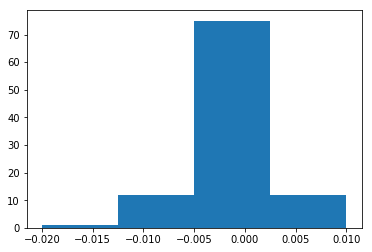

In [1472]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(avg_displacement_100, bins=4)
plt.show()

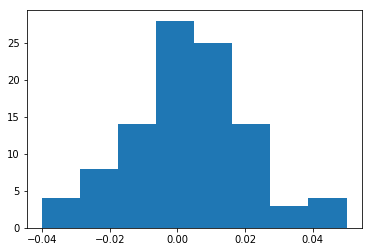

In [1475]:
i = 0
displace_list = []
while i < len(x_list) - 1:    
    displace = map(operator.sub, x_list[i+1] ,x_list[i])
    displace_list.append(displace)
    i += 1
    
List = np.array(displace_list)
# Using numpy sum 
sum_displacement = np.sum(List, 0) 
avg_displacement_1000 = sum_displacement/100

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(avg_displacement_1000, bins=8)
plt.show()

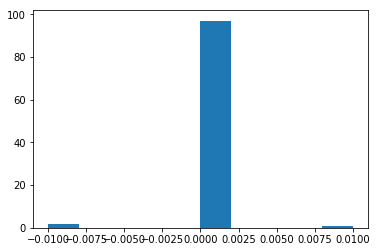

In [1511]:
i = 0
displace_list = []
while i < len(x_list) - 1:    
    displace = map(operator.sub, x_list[i+1] ,x_list[i])
    displace_list.append(displace)
    i += 1
    
List = np.array(displace_list)
# Using numpy sum 
sum_displacement = np.sum(List, 0) 
avg_displacement_10 = sum_displacement/100

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(avg_displacement_10)
plt.show()

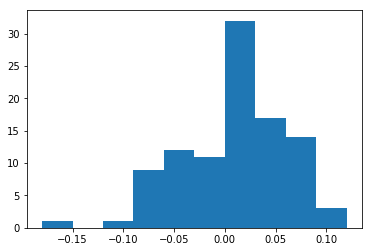

In [1516]:
i = 0
displace_list = []
while i < len(x_list) - 1:    
    displace = map(operator.sub, x_list[i+1] ,x_list[i])
    displace_list.append(displace)
    i += 1
    
List = np.array(displace_list)
# Using numpy sum 
sum_displacement = np.sum(List, 0) 
avg_displacement_10000 = sum_displacement/100

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(avg_displacement_10000)
plt.show()

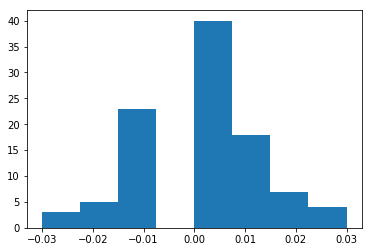

In [1485]:
i = 0
displace_list = []
while i < len(x_list) - 1:    
    displace = map(operator.sub, x_list[i+1] ,x_list[i])
    displace_list.append(displace)
    i += 1
    
List = np.array(displace_list)
# Using numpy sum 
sum_displacement = np.sum(List, 0) 
avg_displacement_500 = sum_displacement/100

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(avg_displacement_500, bins=8)
plt.show()

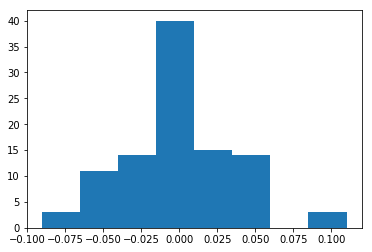

In [1496]:
i = 0
displace_list = []
while i < len(x_list) - 1:    
    displace = map(operator.sub, x_list[i+1] ,x_list[i])
    displace_list.append(displace)
    i += 1
    
List = np.array(displace_list)
# Using numpy sum 
sum_displacement = np.sum(List, 0) 
avg_displacement_5000 = sum_displacement/100

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(avg_displacement_5000, bins=8)
plt.show()

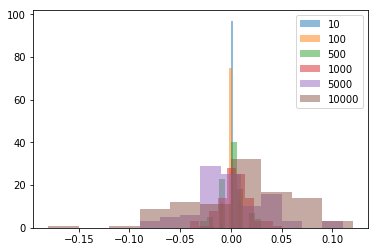

In [1517]:
from matplotlib import pyplot
pyplot.hist(avg_displacement_10, alpha=0.5, label='10')
pyplot.hist(avg_displacement_100, alpha=0.5, label='100')
pyplot.hist(avg_displacement_500, alpha=0.5, label='500')
pyplot.hist(avg_displacement_1000, alpha=0.5, label='1000')
pyplot.hist(avg_displacement_5000, alpha=0.5, label='5000')
pyplot.hist(avg_displacement_10000, alpha=0.5, label='10000')
pyplot.legend(loc='upper right')
pyplot.show()

In [1518]:
with open('/Users/ganglion/Downloads/avg_displacement_10.txt', 'w') as filehandle:
    for listitem in avg_displacement_10:
        filehandle.write('%s\n' % listitem)

with open('/Users/ganglion/Downloads/avg_displacement_100.txt', 'w') as filehandle:
    for listitem in avg_displacement_100:
        filehandle.write('%s\n' % listitem)

with open('/Users/ganglion/Downloads/avg_displacement_500.txt', 'w') as filehandle:
    for listitem in avg_displacement_500:
        filehandle.write('%s\n' % listitem)
        
with open('/Users/ganglion/Downloads/avg_displacement_1000.txt', 'w') as filehandle:
    for listitem in avg_displacement_1000:
        filehandle.write('%s\n' % listitem)
with open('/Users/ganglion/Downloads/avg_displacement_5000.txt', 'w') as filehandle:
    for listitem in avg_displacement_5000:
        filehandle.write('%s\n' % listitem)
with open('/Users/ganglion/Downloads/avg_displacement_10000.txt', 'w') as filehandle:
    for listitem in avg_displacement_10000:
        filehandle.write('%s\n' % listitem)

In [1074]:
#print store_layout.values()

x_dim = []
y_dim = []
ref_x = list(store_layout[0][0])[0] 
ref_y = list(store_layout[0][0])[1]

i = 0

while i < len(store_layout) -1:
    x =  list(store_layout.values()[i][0])[0]
    y = list(store_layout.values()[i][0])[1]
    
    next_x = list(store_layout.values()[i+1][0])[0]
    next_y = list(store_layout.values()[i+1][0])[1]
    
    x_displacement = next_x - x
    y_displacement = next_y - y
    
    x_dim.append(x_displacement)
    y_dim.append(y_displacement)
    
    i += 1

    


In [1080]:
with open('/Users/ganglion/Downloads/x_dim.txt', 'w') as filehandle:
    for listitem in x_dim:
        filehandle.write('%s\n' % listitem)

with open('/Users/ganglion/Downloads/y_dim.txt', 'w') as filehandle:
    for listitem in y_dim:
        filehandle.write('%s\n' % listitem)
    


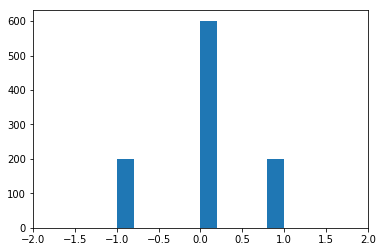

In [1094]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

#n_bins = 5

#fig, axs = plt.subplots(1, 2, sharey=True)

# We can set the number of bins with the `bins` kwarg
#axs[0].hist(x_dim)
#axs[1].hist(y_dim)

plt.xlim(-2, 2)
plt.hist(x_dim)
plt.show()

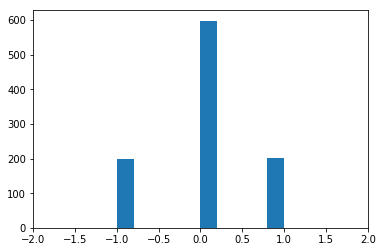

In [1096]:
plt.xlim(-2, 2)
plt.hist(y_dim)
plt.show()

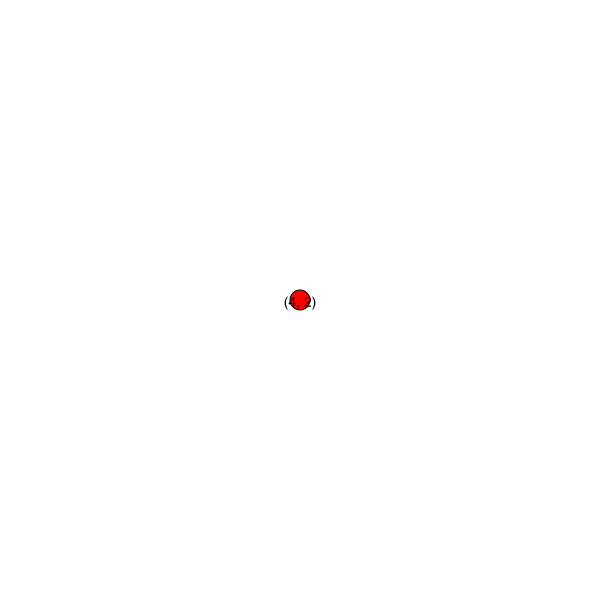

In [996]:
igraph.plot(g, layout=g.vs['position'], vertex_label=g.vs['name'] )

# Autocorrelation analysis

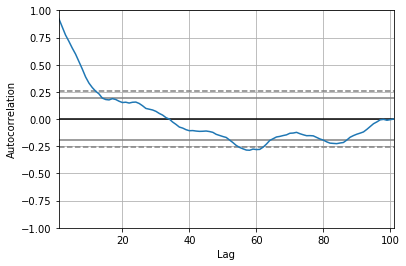

In [1556]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
#from statsmodels.graphics.tsaplots import plot_acf

fig = autocorrelation_plot(x_list)

#pyplot.show()
plt.savefig("/Users/ganglion/Downloads/autocorrelation_t100.pdf")

In [1550]:
with open('/Users/ganglion/Downloads/x_list.txt', 'w') as filehandle:
    for listitem in x_list:
        filehandle.write('%s\n' % listitem)

# testing graph plotting

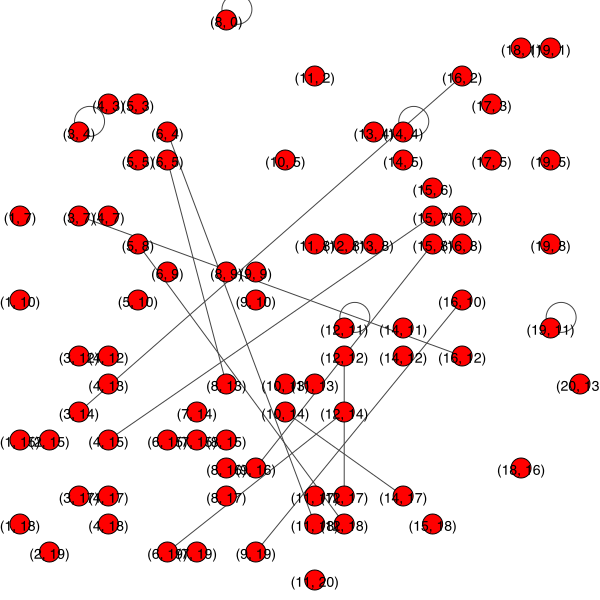

In [25]:
from IPython.core.display import display, SVG
import cairocffi as cairo
import igraph

dictlist = []
for key, value in layout_old.iteritems():
    dictlist.append(key)
    
igraph.plot(g, layout=g.vs['position'], vertex_label=g.vs['name'] )

In [26]:
print g

IGRAPH UN-- 80 16 --
+ attr: index (v), name (v), position (v)
+ edges (vertex names):
(3, 4)--(3, 4), (19, 11)--(19, 11), (14, 4)--(14, 4), (8, 0)--(8, 0), (12,
11)--(12, 11), (4, 15)--(15, 7), (16, 2)--(3, 14), (6, 4)--(11, 18), (5,
8)--(12, 18), (6, 19)--(12, 14), (9, 16)--(15, 8), (12, 12)--(12, 17), (3,
7)--(16, 12), (8, 13)--(6, 5), (14, 17)--(10, 14), (9, 19)--(16, 10)


In [27]:
#LEFT OFF TRYING TO FIX THE NEIGHBORING EDGE PROBLEM..
#TO DO: write a new funciton that uses neighbor_tracking dict and adds edges to those nodes only
print neighbor_tracking

{(14, 17): 'NaN', (14, 4): [(14, 5), (13, 4)], (13, 4): [(14, 4)], (12, 12): [(13, 12), (12, 11)], (6, 9): 'NaN', (3, 7): 'NaN', (5, 8): 'NaN', (5, 5): [(6, 5)], (12, 17): [(12, 18), (11, 17)], (8, 15): [(8, 16), (7, 15)], (10, 13): [(11, 13)], (9, 16): [(8, 16)], (12, 11): [(12, 12)], (3, 12): [(4, 12)], (4, 15): 'NaN', (9, 9): 'NaN', (10, 14): [(10, 13)], (9, 19): 'NaN', (12, 8): [(13, 8), (11, 8)], (1, 15): [(2, 15)], (8, 9): [(9, 9), (8, 10)], (4, 12): 'NaN', (3, 17): 'NaN', (16, 7): [(16, 8), (15, 7)], (7, 15): [(8, 15), (6, 15), (7, 14)], (14, 5): 'NaN', (16, 10): 'NaN', (19, 11): 'NaN', (18, 16): 'NaN', (1, 10): 'NaN', (6, 4): [(6, 5)], (12, 18): [(11, 18), (12, 17)], (15, 7): [(16, 7), (15, 8), (15, 6)], (5, 10): 'NaN', (4, 17): [(4, 18), (3, 17)], (14, 12): [(14, 11)], (11, 20): 'NaN', (19, 1): [(18, 1)], (19, 8): 'NaN', (8, 13): 'NaN', (8, 0): 'NaN', (18, 1): 'NaN', (2, 19): 'NaN', (7, 19): [(8, 19), (6, 19)], (4, 13): [(4, 12)], (8, 16): [(9, 16)], (6, 15): [(7, 15)], (11, 1

In [ ]:
# [move, bind, self_bind, dissociate]
rxn_results.sum(axis=0)

In [ ]:
#at 28% filled 
#total_rxn = np.zeros(shape=(10,4))
total_rxn[9] = rxn_results.sum(axis=0)

In [ ]:
#total_rxn=np.delete(total_rxn, 3, axis=1)
#total_rxn=np.delete(total_rxn, 0, axis=1)
total_rxn=total_rxn/np.sum(total_rxn)

In [ ]:
# Create a figure instance
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure(1, figsize=(5, 5))
fig.suptitle('Test', fontsize=12, fontweight='bold')


# Create an axes instance
ax = fig.add_subplot(111)
ax.set_ylabel('test')



# Create the boxplot
bp = ax.boxplot(total_rxn )
fig.savefig('total_rxn_28.pdf', bbox_inches='tight')

In [ ]:
#at 5% filled 
#total_rxn_5 = np.zeros(shape=(10,4))
#total_rxn_5[0] = rxn_results.sum(axis=0)
total_rxn_5

total_rxn_5=np.delete(total_rxn_5, 3, axis=1)
total_rxn_5=np.delete(total_rxn_5, 0, axis=1)
total_rxn_5=total_rxn_5/np.sum(total_rxn_5)

In [ ]:
fig = plt.figure(1, figsize=(5, 5))
fig.suptitle('Test', fontsize=12, fontweight='bold')


# Create an axes instance
ax = fig.add_subplot(111)
ax.set_ylabel('test')



# Create the boxplot
bp = ax.boxplot(total_rxn_5 )
fig.savefig('fig_5.pdf', bbox_inches='tight')

In [ ]:
#at 60% filled 
#total_rxn_60 = np.zeros(shape=(10,4))

total_rxn_60=np.delete(total_rxn_60, 3, axis=1)
total_rxn_60=np.delete(total_rxn_60, 0, axis=1)
total_rxn_60=total_rxn_60/np.sum(total_rxn_60)
print total_rxn_60

In [ ]:
fig = plt.figure(1, figsize=(5, 5))
fig.suptitle('Test', fontsize=12, fontweight='bold')


# Create an axes instance
ax = fig.add_subplot(111)
ax.set_ylabel('test')



# Create the boxplot
bp = ax.boxplot(total_rxn_60 )
fig.savefig('fig_60.pdf', bbox_inches='tight')

In [ ]:
from __future__ import division

k_move = 1e-1
k_bind = 1e5 
k_off = 1e1
len_factor = 1
tau = 1e-3

# movement
move = sum(move_count.values() )
move_k = move * k_move

# bind (intermolecular)
num_of_intermolc = rxn_results.sum(axis=0)[1]
bind_k = num_of_intermolc * k_bind

# self-bind (intramolecular)
self_bind_k = k_bind

# dissociate
dissociate = len(g.get_edgelist())
dissociate_k = k_off

print move_k, bind_k, self_bind_k, dissociate_k

    
k_0 = move_k + bind_k + self_bind_k + dissociate_k

print '……'
print k_0
print move_k/k_0
print bind_k/k_0
print self_bind_k/k_0
print dissociate_k/k_0
    
for i in range(50):
    print allRxn(move_k, bind_k, self_bind_k, dissociate_k)


#options = numpy.zeros((4, 1))
#options[0] = move/k_0
#options[1] = bind/k_0
#options[2] = self_bind/k_0
#options[3] = dissociate/k_0
#print options
#print move/k_0

In [ ]:
myList=options
myNumber=0.01
out_val = min(myList, key=lambda x:abs(x-myNumber))

if out_val == options[0]:
    print 'move'
if out_val == options[1]:
    print 'bind'
if out_val == options[2]:
    print 'self_bind'
if out_val == options[3]:
    print 'dissociate'

In [401]:
sum(bind_count.values()) *1e-4*tau
dissociate = len(g.get_edgelist())                            # dissociation
dissociate_k = dissociate * k_off * tau

2.96e-05

0.0

In [394]:
print move_k
print bind_k
print dissociate_k

0.0398
29600.0
0.0


In [326]:
k_move = 1e-3
k_bind = 1e-4
k_off = 1e-1
len_factor = 0.01
tau = 1e-3
times = []
        
move = sum(move_count.values() )                              # movement
move_k = move * k_move * tau

bind = sum(bind_count.values() )                              # binding
bind_k = bind * k_bind * tau

rxn_type = []
for i in range(5000):
    rxn_type.append( allRxn(move_k, bind_k, self_bind_k, dissociate_k) )
collections.Counter(rxn_type)

Counter({'bind': 2, 'dissociate': 2, 'move': 64, 'self_bind': 4932})

In [345]:
2.92e-07/0.04

7.3e-06

array([  4.,   0., 997.,   0.])

In [354]:
collections.Counter(binding_result)

Counter({1: 842, 2: 457})

In [137]:
(715, 33) 6183, 79
(559, 0)  5610, 40
607, 0

d = {'col1': [1, 2], 'col2': [3, 4]}

## Plot results

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [34]:
binding_result = []
for i in range(len(g.get_edgelist() ) ):
    # store tuple in online fashion
    to_check = g.get_edgelist()[i]
    # count the number of times this index repeats. 
    # If it is once, then it is a higer level binder. If it is two it is a self binder
    binding_result.append( to_check.count(to_check[0]) )

## Example of interaction as a function of density (500/55x55)

In [35]:
print collections.Counter(binding_result)

Counter()


In [294]:
#intra_molc = summarized_results[:,0]
#inter_molc = summarized_results[:,1]

intra_molc = binding_result[:, 0]
inter_molc = binding_result[:, 1]

plt.scatter(times, intra_molc, s =1,alpha=.5, c ='orange')
plt.scatter(times, [0]*len(times), s =1,alpha=.5, c='blue')

plt.ylabel('Amount of Product',  fontsize=9)
plt.xlabel('Time',  fontsize=9)

plt.show()

TypeError: list indices must be integers, not tuple

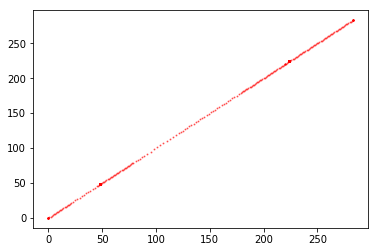

In [295]:
plt.scatter(inter_molc, intra_molc, s =1,alpha=.5, c ='red')

## Example of interaction as a function of density (2800/55x55)

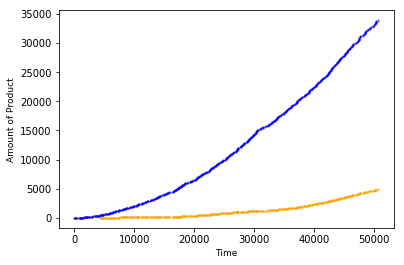

In [409]:
intra_molc = summarized_results[:,0]
inter_molc = summarized_results[:,1]

plt.scatter(times, intra_molc, s =1,alpha=.5, c='orange')
plt.scatter(times, inter_molc, s =1,alpha=.5, c='blue')

plt.ylabel('Amount of Product',  fontsize=9)
plt.xlabel('Time',  fontsize=9)

plt.show()

##  Example of interaction as a function of density (1400/55x55)

In [477]:
# 2 is INTRA, 1 is INTER
print collections.Counter(binding_result)

Counter({2: 13747, 1: 1222})


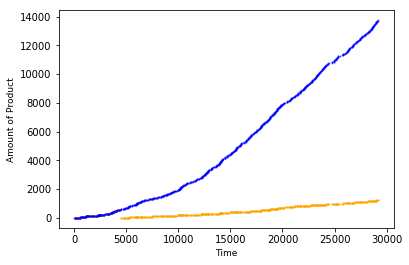

In [478]:
intra_molc = summarized_results[:,0]
inter_molc = summarized_results[:,1]

plt.scatter(times, intra_molc, s =1,alpha=.5, c='orange')
plt.scatter(times, inter_molc, s =1,alpha=.5, c='blue')

plt.ylabel('Amount of Product',  fontsize=9)
plt.xlabel('Time',  fontsize=9)

plt.show()

## Example of interaction as a function of density (2000/55x55)

In [468]:
# 2 is INTRA, 1 is INTER
print collections.Counter(binding_result)

Counter({2: 22391, 1: 1659})


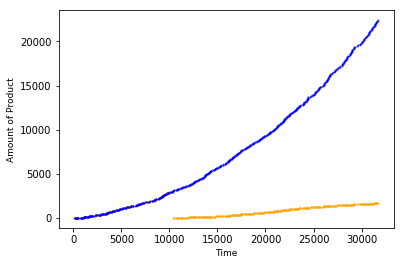

In [469]:
intra_molc = summarized_results[:,0]
inter_molc = summarized_results[:,1]

plt.scatter(times, intra_molc, s =1,alpha=.5, c='orange')
plt.scatter(times, inter_molc, s =1,alpha=.5, c='blue')

plt.ylabel('Amount of Product',  fontsize=9)
plt.xlabel('Time',  fontsize=9)

plt.show()